
# CV2 for Image processing
# Numpy for Array Processing
# OS for dealing with directory
# tqdm for showing the progress in graphics(Progress Bar)
# tflearn For making CNN
# keras for Image augmentation

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os 
from tqdm import tqdm   
import tflearn

#tflearn works with tenhttp://localhost:8888/notebooks/Desktop/Facial%20Recognition%20Project%20Dignique%20Techlabs/Cnn.ipynb#tflearn-For-making-CNNsorflow 1.13.2
#pip install tensorflow==1.13.2  because tflearn works with it
#pip install tflearn


C:\Users\harsh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\harsh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\harsh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\harsh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.


# Image Augmentation
# Making Dataset       
# Don't run this code as dataset is already made.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img 
import os
   
datagen = ImageDataGenerator(rotation_range = 40, shear_range = 0.2, 
                             zoom_range = 0.3, horizontal_flip = True,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             brightness_range = (0.5, 3.0)) 
    
img_path="img"
images=[]            #appending all images in images list
for im in os.listdir(img_path):
    images.append(os.path.join(img_path,im))


In [ ]:
for i in images:
        img = load_img(i)    #loading 
        x = img_to_array(img) #converting image to array
        x = x.reshape((1, ) + x.shape)  
        i=0
        for batch in datagen.flow(x, batch_size = 1,save_to_dir ='preview',save_prefix ='Navn', save_format ='jpeg'): 
            i += 1
            if i > 139: 
                break

# Location where Images are stored

In [2]:
loc=r'preview'           #Image stored in Folder Named Preview


# Extracting Labels

In [3]:

label=[]          #label is list in which labels are extracted/appended.
#os.listdir() is function used to list down all the files in directory 

for i in os.listdir(loc):
    if i.split('_')[0]=='Moi':
        label.append([0.0,0.0,0.0,1.0])   #one hot encoding 
    elif i.split('_')[0]=='Navn':         #due to categorical crossentropy
        label.append([0.0,0.0,1.0,0.0])
    if i.split('_')[0]=='Sahil':
        label.append([0.0,1.0,0.0,0.0])
    if i.split('_')[0]=='Hemu':
        label.append([1.0,0.0,0.0,0.0])
#we are separating labels using the concept of split


# Extracting the features in grayscale
Data set consist of 4228 images of 4 persons

In [4]:
#features is list in which the features of respective images are appended 
features=[]
for i in tqdm(os.listdir(loc)):
    f=cv2.imread(os.path.join(loc,i),0)  #Image are read in grayscale
    resized_f=cv2.resize(f,(70,70))   #resizing all images to 70*70
    features.append(resized_f)
    



100%|█████████████████████████████████████████████████████████████████████████████| 4228/4228 [00:18<00:00, 233.11it/s]


Converting Features and Label to Array so that we could pass them ,
Here Reshape is used to convert data into 4d array so that we can pass data to input layer


In [5]:
# divived by 255 to normalize the data 
X=np.array(features).reshape(4228,70,70,1)/255  #Array 
Y=np.array(label)              


In [6]:
X.shape            #Checking The Shape Of Data
# current consist 4228 images of size (70*70*1)

(4228, 70, 70, 1)

# Splitting the Data Set (test_size=0.3)

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)


In [8]:
xtest.shape          #shape of testing 
#i.e 1269 Images

(1269, 70, 70, 1)

In [9]:
xtrain.shape         #shape of training Dataset
#i.e 2959 images

(2959, 70, 70, 1)

# Declaring Learning Rate
# Declaring Model Name

In [10]:

LR=0.001            #Learing Rate
MODEL_NAME = 'my-{}-{}.model'.format(LR, '2conv-basic') # just so we remember which save

# Using Save Model (If Needed)

In [17]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):           #Using Saved Model
    model.load(MODEL_NAME)    #loading the model
    print('model loaded!') 


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\harsh\Desktop\Facial Recognition Project\my-0.001-2conv-basic.model
model loaded!


# Importing Libraries Used for CNN
# 1.conv_2d for  creating convolutional layer
# 2.regression For Optimization
# 3.max_pool_2d for pooling out maxpooling layer 
# 4.input_data for input 
# 5.dropout for Dropping out some weight if they are not needed
# 6.fully_connected for full connected layers

In [11]:
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout ,fully_connected
from tflearn.layers.estimator import regression

# Defining Input Layer 
Format :conv=input_data(shape=[None,IMG_size,IMG_size,1],name='input')
size of sample not known so none passed here

In [12]:
conv=input_data(shape=[None,70,70,1],name='input') 
#None is used here to make it workable for dataset of any size
#4D array passed as input to layer

# Making Convolutional Layers
# Max Pooling on Convolutional Layer
# Total 6 Convolutional Layer
66(Size of Layer) is wrt calculation of filter size 5



In [13]:
conv=conv_2d(conv,66,5,activation='relu')
conv=max_pool_2d(conv,5)

conv=conv_2d(conv,62,5,activation='relu')
conv=max_pool_2d(conv,5)

conv=conv_2d(conv,58,5,activation='relu')
conv=max_pool_2d(conv,5)

conv=conv_2d(conv,54,5,activation='relu')
conv=max_pool_2d(conv,5)

conv=conv_2d(conv,50,5,activation='relu')
conv=max_pool_2d(conv,5)



conv=conv_2d(conv,46,5,activation='relu')
conv=max_pool_2d(conv,5)

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


# Defining Fully Connected Layer
previous layer size was 46 so next layer=46-4=42
Here size 1764=42*42

In [14]:
conv=fully_connected(conv,1764 ,activation='relu')


conv=fully_connected(conv,4,activation='softmax')


# Compilation 

In [15]:
conv=regression(conv,optimizer='adam',learning_rate=LR,
               loss='categorical_crossentropy',name='targets')


Instructions for updating:
keep_dims is deprecated, use keepdims instead


# Defining the  model

In [16]:

model=tflearn.DNN(conv)


Instructions for updating:
Use tf.cast instead.


# Fitting the model

In [18]:
history=model.fit({'input': xtrain}, {'targets': ytrain}
         ,n_epoch=17,
         validation_set=({'input':xtest},{'targets':ytest}),
         show_metric=True)

Training Step: 845  | total loss: 0.14545 | time: 31.755s
| Adam | epoch: 001 | loss: 0.14545 - acc: 0.9569 -- iter: 2944/2959
Training Step: 846  | total loss: 0.13914 | time: 36.552s
| Adam | epoch: 001 | loss: 0.13914 - acc: 0.9581 | val_loss: 0.11454 - val_acc: 0.9606 -- iter: 2959/2959
--


# Training Accuracy of 95 %
# Testing accuracy of 90 %

# Saving the model for future purpose

In [ ]:
model.save(MODEL_NAME) 

# Predicting test cases (Checking Manually)

In [19]:
d=xtest[10].reshape(1,70,70,1)
predtn=np.argmax(model.predict(d))
if predtn==0:               #np.argmax returns index of maximum argument
   print("Hemant")          #model.predict predicts the category
if predtn==1:
   print("Sahil") 
if predtn==2:
   print("Navneet") 
if predtn==3:
   print("Moi") 


Sahil


In [20]:
ytest[10]   #correct Predicition

array([0., 1., 0., 0.])

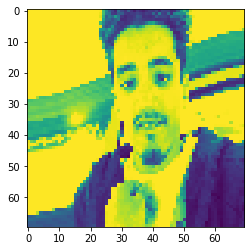

In [21]:
import matplotlib.pyplot as plt
plt.imshow(xtest[10].reshape(70,70))

# Prediction of new cases

In [22]:
lc=r'Predict'    #new images are stored in folder named predict 

pred=[]      #we are extracting that in list named pred
for i in os.listdir(lc):
    p=cv2.imread(os.path.join(lc,i),0)
    resized_p=cv2.resize(p,(70,70))   #resizing all imgaes
    pred.append(resized_p)     #appending current features
    


pred=np.array(pred)/255     #divided  by 255 to normalize the data

    


In [23]:
predtn=np.argmax(model.predict(pred[2].reshape(1,70,70,1)))
if predtn==0:
   print("Hemant") 
if predtn==1:
   print("Sahil") 
if predtn==2:
   print("Navneet") 
if predtn==3:
   print("Moi")

Hemant


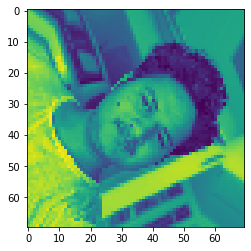

In [26]:
import matplotlib.pyplot as plt

plt.imshow(pred[2])    

In [27]:
#correct prediciton

#  Saving code As HTML FILE

In [32]:
! jupyter nbconvert --to html Cnn

[NbConvertApp] Converting notebook Cnn.ipynb to html
[NbConvertApp] Writing 390075 bytes to Cnn.html


# GUI of Project
# GUI made using Tkinter and PIL library and using the saved model to predict

In [29]:

#Created on Mon Jun 29 01:00:56 2020

#@author: Hemant

LR=0.001
MODEL_NAME = 'my-{}-{}.model'.format(LR, '2conv-basic') # just so we remember which save
import tkinter as tk             
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image,ImageOps 
import numpy
import tensorflow as tf
#load the trained model to classify persons
from keras.models import load_model
#if os.path.exists('{}.meta'.format(MODEL_NAME)):
 #   model.load(MODEL_NAME)
  #  print('model loaded!')

model.load(MODEL_NAME)
#dictionary to label all Persons.
classes = { 1:'Hemant',
            2:'Sahil', 
            3:'Navneet', 
            4:'Moi', 
  }
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Image Classification')
top.configure(background='#00ffff')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    
    image = Image.open(file_path)
    p=cv2.imread(file_path,0)
    resized_p=cv2.resize(p,(70,70)) 
    #image=cv2.imread(file_path,0)
    #image = ImageOps.greyscale(image) 
    #image = image.resize((70,70))
    

    #image = numpy.expand_dims(resized_p, axis=0)
    image = numpy.array(resized_p).reshape(1,70,70,1)
    image=image/255
    print(image.shape)
    #image=image.reshape(70,70,1)
    
    
    pred =np.argmax(model.predict(image)[0])
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Guess Name",pady=20, font=('arial',23,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()
    

Using TensorFlow backend.


INFO:tensorflow:Restoring parameters from C:\Users\harsh\Desktop\Facial Recognition Project\my-0.001-2conv-basic.model
(1, 70, 70, 1)
Hemant
